In [344]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 

# 결측치 탐지
import missingno as msno

In [345]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [346]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

- 보스턴 집값 데이터 독립변수
    - CRIM : 인구 1명당 범죄 발생 수
    - ZN : 25,000 평방 피트 이상의 주거 구역 비중
    - INDUS : 소매업 외 상업이 차지하는 면적 비율
    - CHAS : 찰스강 위치 변수 (1: 강 주변, 0 : 이외) => 이거 원핫인코딩 해주는 게 ...
    - NOX : 일산화질소 농도
    - RM : 집의 평균 방 수
    - AGE : 1940년 이전에 지어진 비율 ( 노후화 )
    - DIS : 5가지 보스턴 시 고용 시설까지의 거리
    - RAD : 순환 고속도로의 접근 용이성
    - TAX : \$10,000 당 부동산 세율 총계
    - PTRATIO : 지역별 학생과 교사 비율
    - B : 지역별 흑인 비율
    - LSTAT : 급여가 낮은 직업에 종사하는 인구 비율(%)
- 종속 변수
    - 가격(단위 : \$1,000)

In [347]:
col_names = [
    "CRIM",
    "ZN",
    "INDUS" ,
    "CHAS",
    "NOX",
    "RM" ,
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B" ,
    "LSTAT",
]

### 테스트 데이터 데이터 프레임으로 만들고 싶은디~~~

In [348]:
df = pd.DataFrame(x_train, columns = col_names)

In [349]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


### 독립변수를 함 봐보자...

In [350]:
df["RAD"] # 용이성은 어떻게 측정하는겨? 거리???

0       4.0
1       2.0
2      24.0
3       5.0
4      24.0
       ... 
399     3.0
400     3.0
401     1.0
402     5.0
403     1.0
Name: RAD, Length: 404, dtype: float64

In [351]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.192179,0.397419,-0.050828,0.405765,-0.217597,0.344410,-0.378590,0.609689,0.575652,0.273447,-0.390613,0.434384
ZN,-0.192179,1.000000,-0.533823,-0.041981,-0.521713,0.338683,-0.578728,0.650787,-0.311091,-0.303522,-0.403139,0.176006,-0.415237
INDUS,0.397419,-0.533823,1.000000,0.052839,0.774200,-0.409924,0.656350,-0.725155,0.599226,0.701362,0.379284,-0.372885,0.603129
CHAS,-0.050828,-0.041981,0.052839,1.000000,0.079803,0.040431,0.080488,-0.083101,-0.024851,-0.051343,-0.122008,0.037832,-0.011017
NOX,0.405765,-0.521713,0.774200,0.079803,1.000000,-0.335866,0.729338,-0.777062,0.616535,0.673471,0.188160,-0.409479,0.592994
RM,-0.217597,0.338683,-0.409924,0.040431,-0.335866,1.000000,-0.240875,0.233970,-0.243990,-0.307904,-0.367256,0.145525,-0.610844
AGE,0.344410,-0.578728,0.656350,0.080488,0.729338,-0.240875,1.000000,-0.766670,0.462188,0.512746,0.282193,-0.278403,0.590898
DIS,-0.378590,0.650787,-0.725155,-0.083101,-0.777062,0.233970,-0.766670,1.000000,-0.511179,-0.543668,-0.243067,0.295995,-0.507075
RAD,0.609689,-0.311091,0.599226,-0.024851,0.616535,-0.243990,0.462188,-0.511179,1.000000,0.922676,0.449908,-0.478245,0.490250
TAX,0.575652,-0.303522,0.701362,-0.051343,0.673471,-0.307904,0.512746,-0.543668,0.922676,1.000000,0.440499,-0.471777,0.534752


In [352]:
# 다중공선성 체크해야지~~
model_sm = sm.OLS(y, x)
model_sm = model_sm.fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 answer   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1425.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):                        0.00
Time:                        11:44:50   Log-Likelihood:                         -1530.1
No. Observations:                 506   AIC:                                      3076.
Df Residuals:                     498   BIC:                                      3110.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0799      0.031     -2.545      0.011      -0.142      -0.018
ZN             0.0437      0.014      3.138      0.002       0.016       0.071
CHAS           2.8766      0.898      3.205      0.001       1.113       4.640
RM             5.5964      0.244     22.926      0.000       5.117       6.076
DIS           -0.7761      0.158     -4.904      0.000      -1.087      -0.465
PTRATIO       -0.4881      0.098     -5.000      0.000      -0.680      -0.296
B              0.0140      0.003      5.404      0.000       0.009       0.019
LSTAT         -0.4853      0.041    -11.761      0.000      -0.566      -0.404
==============================================================================
Omnibus:                      189.204   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.081
Skew:                           1.526   Prob(JB):                    2.39e-236
Kurtosis:                       9.492   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 종속변수도 합쳐주기

In [353]:
answer_name = ["answer"]
answer_df = pd.DataFrame(y_train, columns = answer_name)
answer_df.head()
df = pd.concat([df, answer_df], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [354]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [355]:
# 결측치 알아보기

<Axes: >

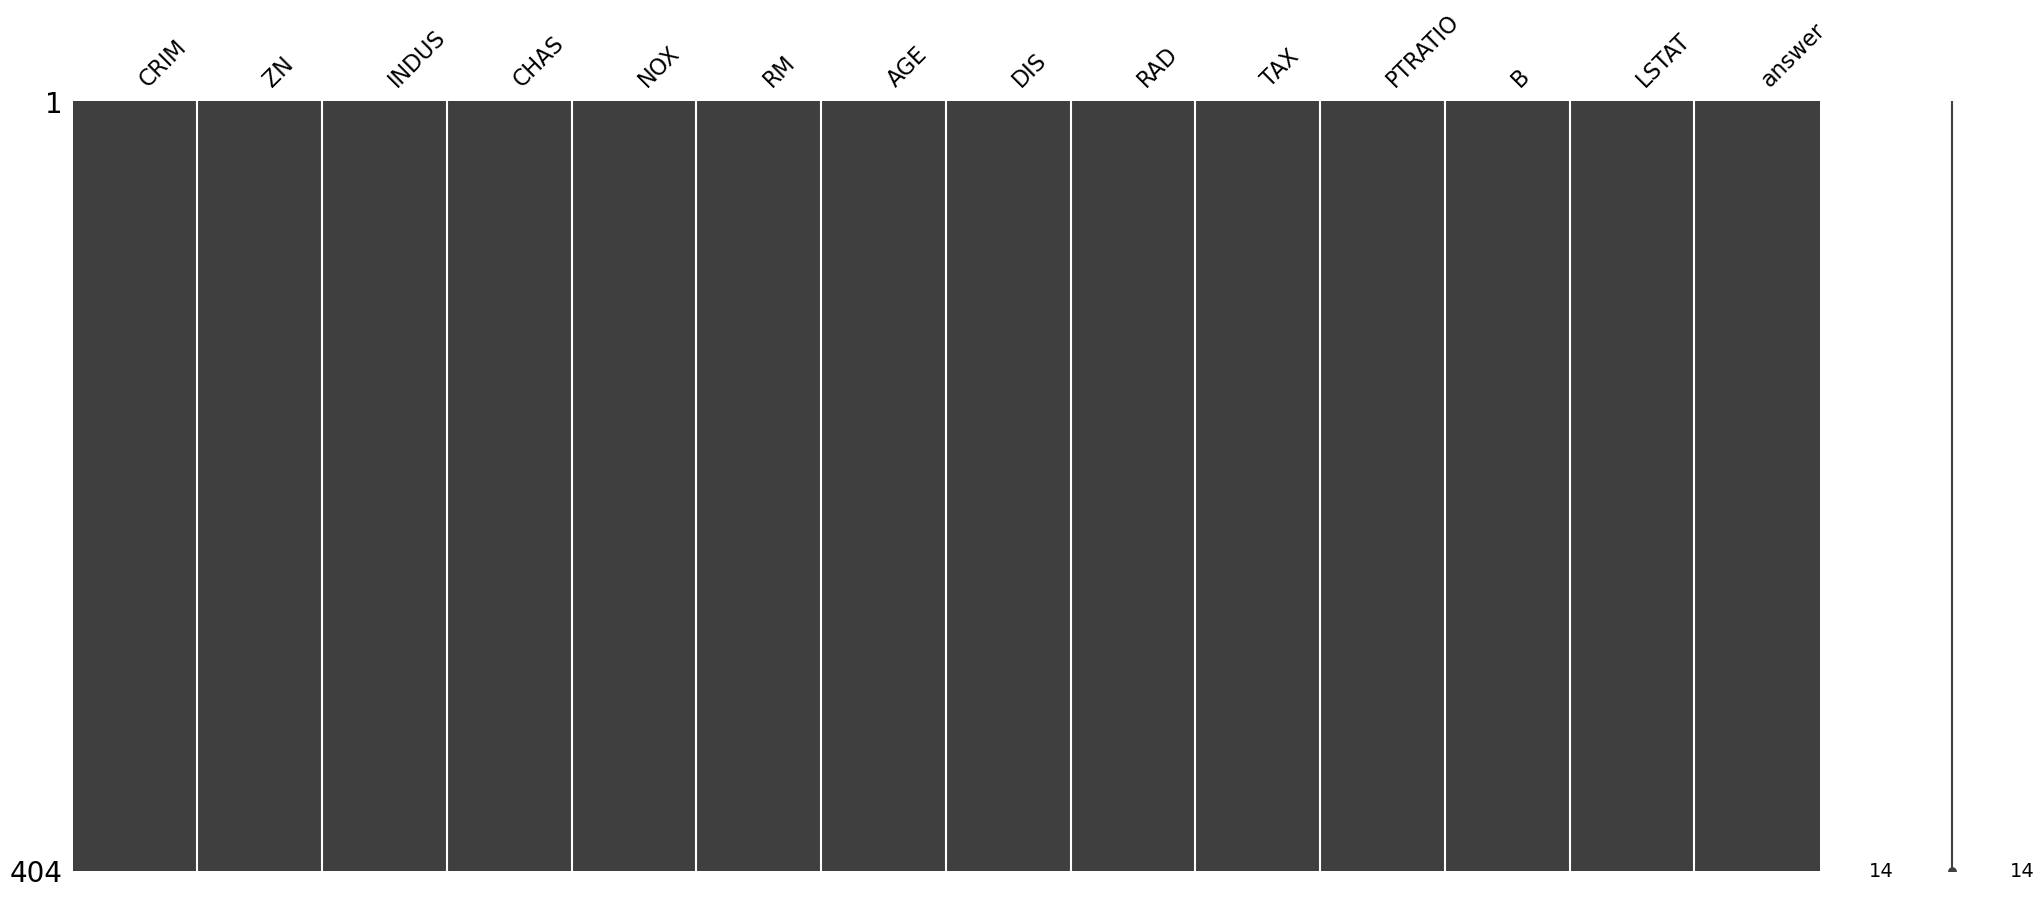

In [356]:
msno.matrix(df) # 읍네여~~

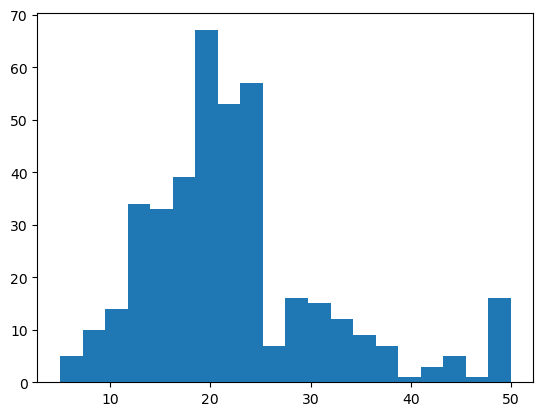

In [357]:
# 종속변수의 분포 알아보기 
plt.hist(df["answer"], bins = 20)
plt.show()

# 찰스강씨 함 원핫인코딩 해볼까여...

In [358]:
df["CHAS"].unique()

array([0., 1.])

In [359]:
# 원핫인코딩안해도 그냥 int로만 바꿔줘도 될 듯
df["CHAS"] = df["CHAS"].astype(int)

- 아주 이쁜 법규를 그리고 있습니다... 너무 이쁜데요~ 뒤에 뭔가 이상한게 있지만 그냥 종모양이라고 쳐도 될것같습니다

# 독립변수와 종속변수 설정하기

In [360]:
x = df.drop("answer", axis = 1)
y = df["answer"]

In [361]:
# 스케일링한것을 한번더 쪼개기
x_sub, x_val, y_sub, y_val = train_test_split(
    x,
    y, 
    test_size =0.2, 
    random_state = 34
)

# 일단 스케일링
ss = StandardScaler()
scaled_x_sub = ss.fit_transform(x_sub)
scaled_x_val = ss.transform(x_val)
scaled_test = ss.transform(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [362]:
scaled_train.shape

(404, 8)

## 모델 만들기

In [363]:
# 간단하게 모델 만들기
model = keras.Sequential()
model.add(keras.Input(shape = (13,)))
model.add(keras.layers.Dense(100, activation ="relu"))
model.add(keras.layers.Dense(1)) # 예측값이니까 그냥 1입력

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

In [364]:
es_cb = keras.callbacks.EarlyStopping(
    patience= 4,
    restore_best_weights= True
)

In [365]:
# 선형회귀는 이렇게 하래여
model.compile(
    optimizer='adam',
    loss='mse',
)
history = model.fit(
    scaled_x_sub, 
    y_sub, 
    epochs = 100, 
    batch_size = 32,
    validation_data=(scaled_test, y_test),
    callbacks=[es_cb])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 589.4211 - val_loss: 592.0646
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 567.8387 - val_loss: 570.4634
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 546.0540 - val_loss: 547.9620
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 523.8367 - val_loss: 524.8326
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 499.7165 - val_loss: 499.7330
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 474.3426 - val_loss: 472.6458
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 446.2483 - val_loss: 443.0508
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 416.4531 - val_loss: 411.8526
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 384.2047 - val_loss: 379.3208
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 351.4405 - val_loss: 344.6248
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 317.5339 - val_loss: 309.9365
Epoch 12/100
11/11

## x_test 가지고 한번 일반화 성능을 체크해보자

In [366]:
model.evaluate(scaled_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.1368 


26.13684844970703

# 예측 해보거라

### 실제값은?

In [367]:
answers1 = y_test
predicts1 = model.predict(scaled_test).flatten()

answer_df = pd.DataFrame(
    {
        "ans" : answers,
        "predict" : predicts,
    }
)
answer_df.head(20)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,ans,predict
0,23.3,29.834333
1,15.0,18.573313
2,19.8,16.755581
3,33.1,31.416571
4,27.9,18.496399
5,21.9,19.806845
6,21.7,19.009466
7,34.9,31.491394
8,22.3,22.758953
9,13.4,16.264589


### 시각화

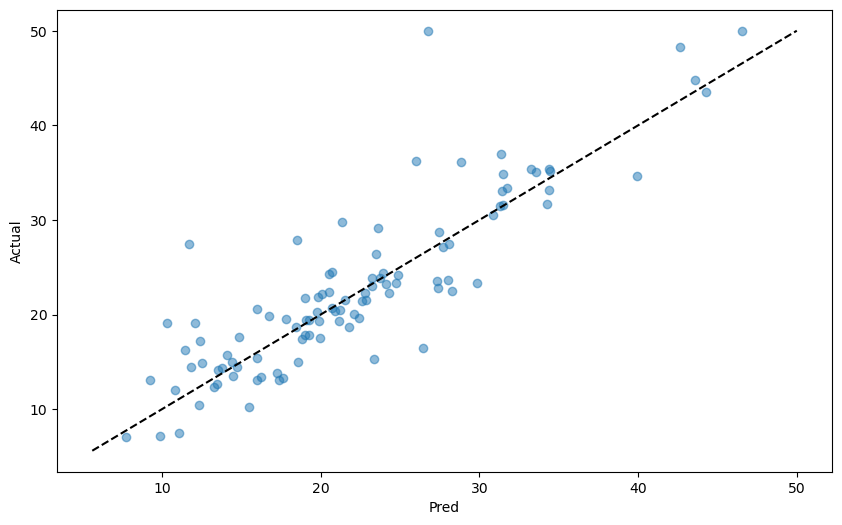

In [368]:
plt.figure(figsize = (10,6))

plt.scatter(predicts, answers, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")

plt.xlabel("Pred")
plt.ylabel("Actual")
plt.show()

# 최적화 ( 모두 합쳐버리기 )

In [369]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

df_train = pd.DataFrame(x_train, columns = col_names)
df_test = pd.DataFrame(x_test, columns = col_names)


answer_name = ["answer"]

answer_df1 = pd.DataFrame(y_train, columns = answer_name)
answer_df2 = pd.DataFrame(y_test, columns = answer_name)


df1 = pd.concat([df_train, answer_df1], axis = 1)
df2 = pd.concat([df_test, answer_df2], axis = 1)

df = pd.concat([df1, df2], axis = 0)

df["CHAS"] = df["CHAS"].astype(int)
df.shape

(506, 14)

In [370]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


# 설득력이 없는 독립변수를 날려버려

In [385]:
x = df.drop(["answer","INDUS", "NOX", "AGE", "TAX","RAD"], axis = 1)
y = df["answer"]

# 스케일링한것을 한번더 쪼개기
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size =0.2,
    random_state = 34
)

# 일단 스케일링
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)


# 간단하게 모델 만들기
model2 = keras.Sequential()
model2.add(keras.Input(shape = (8,)))
model2.add(keras.layers.Dense(100, activation ="relu"))
model2.add(keras.layers.Dense(1)) # 예측값이니까 그냥 1입력


es_cb = keras.callbacks.EarlyStopping(
    patience= 4,
    restore_best_weights= True
)


# 선형회귀는 이렇게 하래여
model2.compile(
    optimizer='adam',
    loss='mse',
    metrics=["root_mean_squared_error", "r2_score"]
)
history2 = model2.fit(
    scaled_train, 
    y_train, 
    epochs = 200, 
    batch_size = 20,
    validation_data=(scaled_test, y_test),
    callbacks=[es_cb])

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 570.7479 - r2_score: -5.7261 - root_mean_squared_error: 23.8903 - val_loss: 566.0647 - val_r2_score: -5.8537 - val_root_mean_squared_error: 23.7921
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 538.6640 - r2_score: -5.3480 - root_mean_squared_error: 23.2091 - val_loss: 533.9308 - val_r2_score: -5.4646 - val_root_mean_squared_error: 23.1069
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 505.6603 - r2_score: -4.9590 - root_mean_squared_error: 22.4869 - val_loss: 500.7018 - val_r2_score: -5.0623 - val_root_mean_squared_error: 22.3764
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 470.8264 - r2_score: -4.5485 - root_mean_squared_error: 21.6985 - val_loss: 463.8281 - val_r2_score: -4.6159 - val_root_mean_squared_error: 21.5367
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 432.6175 - r2_score: -4.0982 - root_mean_squared_error: 20.7995 - val_loss: 421.8675 - val_r2_score: -4.1078 - v

# 최적화 후 성능보자

In [386]:
model2.evaluate(scaled_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.5472 - r2_score: 0.7754 - root_mean_squared_error: 4.3066 


[18.54719352722168, 4.306645393371582, 0.7754373550415039]

## 과연 실제값은??

In [387]:
answers2 = y_test.values
predicts2 = model2.predict(scaled_test).flatten()

answer_df = pd.DataFrame(
    {
        "ans" : answers,
        "predict" : predicts,
    }
)
answer_df.head(20)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,ans,predict
0,23.3,29.834333
1,15.0,18.573313
2,19.8,16.755581
3,33.1,31.416571
4,27.9,18.496399
5,21.9,19.806845
6,21.7,19.009466
7,34.9,31.491394
8,22.3,22.758953
9,13.4,16.264589


- 아까보다는 나아짐

In [388]:
# 다중공선성 체크해야지~~
model_sm = sm.OLS(y, x)
model_sm = model_sm.fit()
model_sm.summary() # 껠꼼하지용

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 answer   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1425.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):                        0.00
Time:                        12:24:45   Log-Likelihood:                         -1530.1
No. Observations:                 506   AIC:                                      3076.
Df Residuals:                     498   BIC:                                      3110.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0799      0.031     -2.545      0.011      -0.142      -0.018
ZN             0.0437      0.014      3.138      0.002       0.016       0.071
CHAS           2.8766      0.898      3.205      0.001       1.113       4.640
RM             5.5964      0.244     22.926      0.000       5.117       6.076
DIS           -0.7761      0.158     -4.904      0.000      -1.087      -0.465
PTRATIO       -0.4881      0.098     -5.000      0.000      -0.680      -0.296
B              0.0140      0.003      5.404      0.000       0.009       0.019
LSTAT         -0.4853      0.041    -11.761      0.000      -0.566      -0.404
==============================================================================
Omnibus:                      189.204   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.081
Skew:                           1.526   Prob(JB):                    2.39e-236
Kurtosis:                       9.492   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  시각화

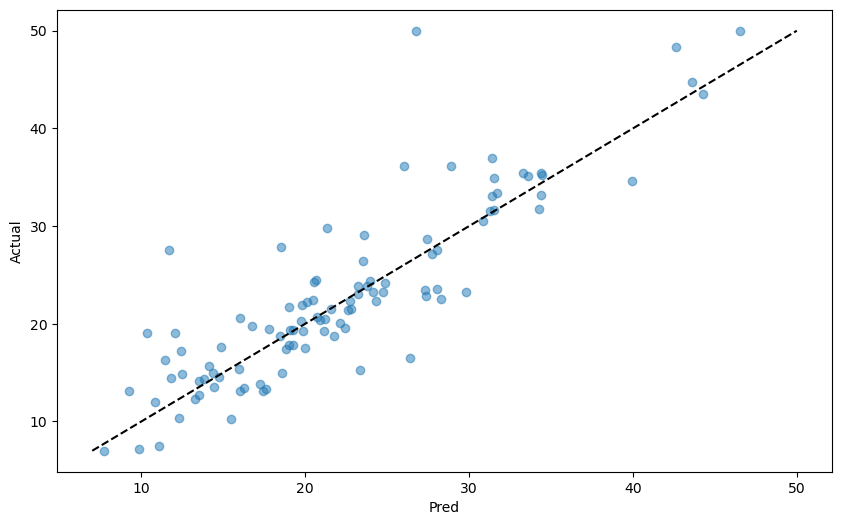

In [389]:
plt.figure(figsize = (10,6))

plt.scatter(predicts, answers, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")

plt.xlabel("Pred")
plt.ylabel("Actual")
plt.show()

# 비교를 하기위해 붙혀놓기

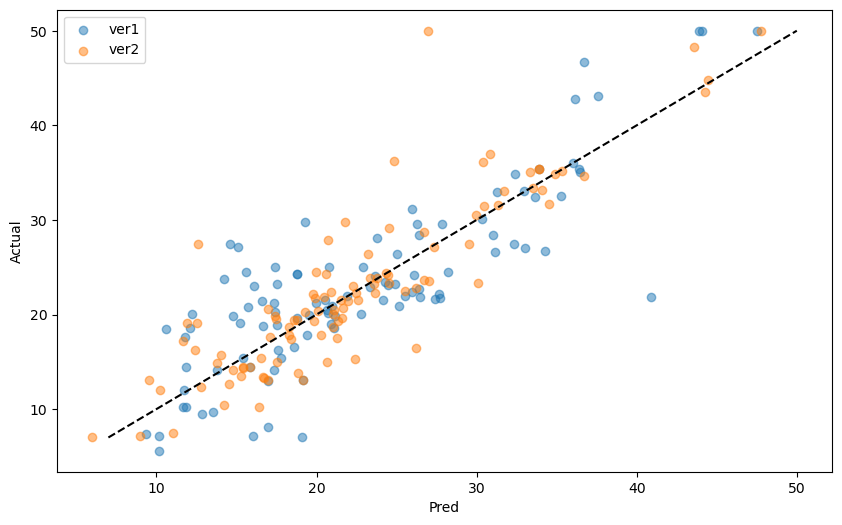

In [390]:
plt.figure(figsize = (10,6))

plt.scatter(predicts1, answers1, alpha = 0.5)
plt.scatter(predicts2, answers2, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")

plt.legend(labels=["ver1", "ver2"])

plt.xlabel("Pred")
plt.ylabel("Actual")
plt.show()

- 시각화로 보니 독립변수 뺀 버전이 점선에 더 가까운것을 볼수있다리